In [27]:
from sunv2 import *
import pylab as pl

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def ArtiLight(alratio,hour,allux):
    if np.abs(hour % 24.0 - 12.0)/12 <= alratio:
        return allux
    return 0.0

def weatherchange():
    pass

def OutdoorLight(hour,cloudiness, clouds, yearday= 91,latitude = 65):
    sunheight = AuKorkeus(yearday,hour,latitude)
    
    s= sigmoid(sunheight)
    sl=sunheight*sigmoid(sunheight-2)+3*s
    sl=(1-s)*sl+s*sunheight
    sunlight = sl*2000 #roughly 0 to 100 000 lux during day
    
    c=cloudiness*0.9
    cy=(1-c*c)
    ca=(1-np.sqrt(c))
    
    light = sunlight * (cy*(1-clouds) + ca*clouds)
    
    return light
    
def IndoorLight(hour,cloudiness,clouds,alratio=18/24, allux =300, daylightfactor=1/32, yearday=91,latitude=65):
    AL = ArtiLight(alratio,hour,allux)
    OL = OutdoorLight(hour,cloudiness,clouds, yearday= yearday,latitude = latitude)
    indoorlight = AL + OL * daylightfactor
    return indoorlight

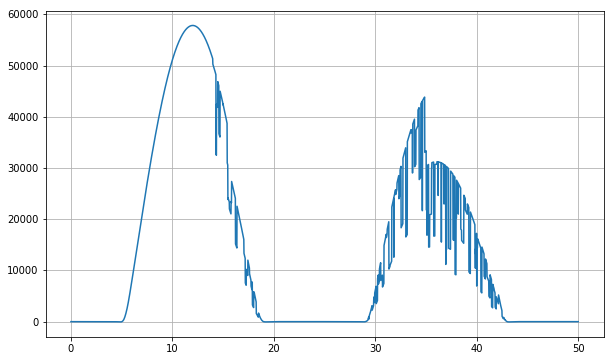

In [109]:
sh=[]
H=[]
h=np.arange(0,50,1/60)
IL=[]
OL=[]

alratio= 20/24
allux=300
dlf= 1/64 #32


r=int(len(h)/200)
R=int(len(h)/2)

L=0
l=0
for i,hour in enumerate(h):
    if i>=l:
        l  = i+np.random.randint(r)
        rn = min(max(1-np.random.random()*2,0),1)
    if i>=L:
        L  = i+np.random.randint(R)
        rnn = min(max(1.2-np.random.random()*2,0),1)
    H.append(hour)
    OL.append(OutdoorLight(hour,rnn, rn, yearday= 91,latitude = 65))
    IL.append(IndoorLight(hour,rnn,rn,alratio=22/24, allux =50, daylightfactor=1/32, yearday=99,latitude=65))
pl.figure(figsize=(10,6))
#pl.plot(H,IL)
pl.plot(H,OL)
pl.grid()

pl.show()

In [90]:
50/200*60*60

900.0

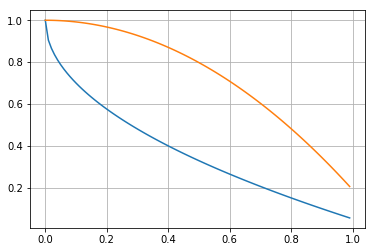

In [114]:
c1=np.arange(0,1,.01)
c=c1*0.9
cy=(1-c*c)
ca=(1-np.sqrt(c))

pl.plot(c1,ca)
pl.plot(c1,cy)
pl.grid()
pl.show()

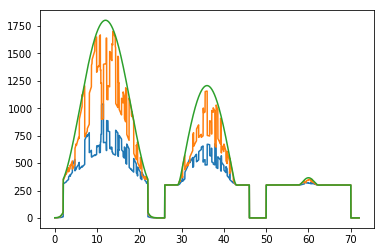

In [108]:
sh=[]
H=[]
h=np.arange(0,24,1/60)
AL=[]

alratio= 20/24
allux=300
dlf= 1/64 #32

for hoo in h:
    sh.append(AuKorkeus(365/2,hoo,65))
    H.append(hoo)
    AL.append(ArtiLight(alratio,hoo,allux))
for hoo in h:
    sh.append(AuKorkeus(365/4,hoo,65))
    H.append(hoo+24)
    AL.append(ArtiLight(alratio,hoo,allux))
for hoo in h:
    sh.append(AuKorkeus(365,hoo,65))
    H.append(hoo+48)
    AL.append(ArtiLight(alratio,hoo,allux))

sh=np.array(sh)
s= sigmoid(sh)
fh=sh*sigmoid(sh-2)+3*s
fh=(1-s)*fh+s*sh
#sh=(sigmoid(np.array(sh)))*np.array(sh)

rnd=np.zeros(len(sh),dtype=float)
r=int(len(sh)/100)
i=0
while True:
    l=np.random.randint(r)
    if i+l > len(sh):
        rnd[i:]=np.random.random()
        break
    rnd[i:i+l]=np.random.random()
    i+=l
    #print(i)

lght_f = fh*2000
lgth_c = fh*(rnd*800+(1-rnd)*2000)
lgth_o = fh*(rnd*rnd*1000+(1-rnd*rnd)*400)


ind_c=lgth_c*dlf+AL
ind_o=lgth_o*dlf+AL
ind_f=lght_f*dlf+AL

#pl.plot(H,fh)
#pl.plot(H,lght_f)
#pl.plot(H,lgth_c)
#pl.plot(H,lgth_o)
pl.plot(H,ind_o)
pl.plot(H,ind_c)
pl.plot(H,ind_f)
#pl.plot(H,AL)

pl.show()




array([0, 0, 0, ..., 0, 0, 0])

<function matplotlib.pyplot.show>

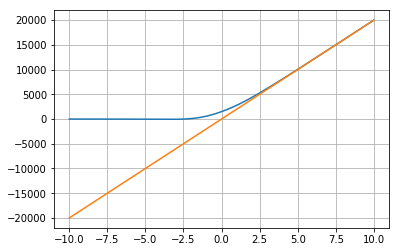

In [21]:
sh=np.arange(-10,10,.01)
s= sigmoid(sh)
fh=sh*sigmoid(sh-2)+3*s
fh=(1-s)*fh+s*sh

pl.plot(sh,fh*2000)
pl.plot(sh,sh*2000)
pl.grid()
pl.show